## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams. Some of these scam e-mails have some offensive content. I don't think anything is worse than R-rated, but I just want to warn you that if you start reading the e-mail text, you might read something offensive. If that's a problem, feel free to e-mail me and we can talk about it more or you can skip the assignment.  

### Q1. 

Open the `Phishing_Email.parquet` data. It is available at `https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet`, and you can download it directly using Pandas by providing that URL: `df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')`.

We just want to look at the first step of cleaning text data, so you can get an idea of how it works. The `Email Text` variable contains the actual text of the email and the `Email Type` takes the value `Phishing Email` or `Safe Email`. We want to predict which emails are phishing emails from their contents. 

Use the `str.split()` method to break the `Phishing Email` values into **tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens. Print the results of your split and examine it.

In words, how would you clean the tokens and use them to predict whether the email is a phishing scam or not? A short summary of the kinds of tasks you would do and how you would run a predictive algorithm is fine.

In [2]:
import numpy as np
import pandas as pd
import pickle
from collections import Counter
from multiprocessing.pool import Pool
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')
tokens = df['Email Text'].str.split()
tokens.head()

0    [re, :, 6, ., 1100, ,, disc, :, uniformitarian...
1    [the, other, side, of, *, galicismos, *, *, ga...
2    [re, :, equistar, deal, tickets, are, you, sti...
3    [Hello, I, am, your, hot, lil, horny, toy., I,...
4    [software, at, incredibly, low, prices, (, 86,...
Name: Email Text, dtype: object

0    [re, :, 6, ., 1100, ,, disc, :, uniformitarian...
1    [the, other, side, of, *, galicismos, *, *, ga...
2    [re, :, equistar, deal, tickets, are, you, sti...
3    [Hello, I, am, your, hot, lil, horny, toy., I,...
4    [software, at, incredibly, low, prices, (, 86,...
Name: Email Text, dtype: object

To predict phishing emails, the text would first be cleaned by converting it to lowercase, removing stop words, punctuation, symbols, and irrelevant numbers. The cleaned text would then be transformed into numerical features using methods like TF-IDF (Term Frequency-Inverse Document Frequency) or Bag of Words. A classification algorithm, such as Logistic Regression or Random Forest, would be trained on these features to distinguish phishing emails from safe ones. The model's performance would be evaluated using metrics like accuracy, precision, recall, and F1 score.

### Q2. 

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

<AxesSubplot:>

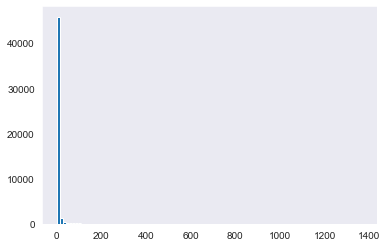

In [4]:
with open('all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)
    
from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

counts = pd.DataFrame(token_freq,columns=['token','count'])
counts['count'].hist(grid=False,bins=100)

Plot a histogram of the occurrences of tokens. What do you notice about the frequency of occurrence of different tokens? How does it look?

The histogram is very skewed and it looks like there is one token that is repeated many many times while others occur much less often in comparison.

### Q3. 

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions?

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

email_data = pd.read_parquet('Phishing_clean.parquet')

labels = email_data['Email Type']
features = email_data.drop(columns=['Email Type'])

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    features, labels, test_size=0.2, random_state=125
)

regression_model = LinearRegression(fit_intercept=False)
regression_model.fit(X_train_split, y_train_split)

train_predictions = regression_model.predict(X_train_split)
test_predictions = regression_model.predict(X_test_split)

print('Training R^2:', r2_score(y_train_split, train_predictions))
print('Testing R^2:', r2_score(y_test_split, test_predictions))

coeff_data = pd.DataFrame({
    'Token': regression_model.feature_names_in_,
    'Coefficient': regression_model.coef_
})
coeff_data['Abs_Coefficient'] = coeff_data['Coefficient'].abs()

sorted_coeff_data = coeff_data.sort_values(by='Abs_Coefficient', ascending=False)
sorted_coeff_data


Training R^2: 0.6945609197690708
Testing R^2: -2.3356623999323873e+21


,Token,Coefficient,Abs_Coefficient
33,2001,1.501232e+13,1.501232e+13
710,1997,1.017499e+13,1.017499e+13
6,2002,7.511127e+12,7.511127e+12
1584,demokritos,7.177256e+12,7.177256e+12
1641,iit,-7.177256e+12,7.177256e+12
...,...,...,...
2053,syntactic,-2.679825e-04,2.679825e-04
1381,saw,-2.593994e-04,2.593994e-04
2416,asia,-2.136230e-04,2.136230e-04
2630,macintosh,6.103516e-05,6.103516e-05


Training R^2: 0.6945609197690708
Testing R^2: -2.3356623999323873e+21


,Token,Coefficient,Abs_Coefficient
33,2001,1.501232e+13,1.501232e+13
710,1997,1.017499e+13,1.017499e+13
6,2002,7.511127e+12,7.511127e+12
1584,demokritos,7.177256e+12,7.177256e+12
1641,iit,-7.177256e+12,7.177256e+12
...,...,...,...
2053,syntactic,-2.679825e-04,2.679825e-04
1381,saw,-2.593994e-04,2.593994e-04
2416,asia,-2.136230e-04,2.136230e-04
2630,macintosh,6.103516e-05,6.103516e-05


Training R^2: 0.6945609197690708
Testing R^2: -2.3356623999323873e+21


,Token,Coefficient,Abs_Coefficient
33,2001,1.501232e+13,1.501232e+13
710,1997,1.017499e+13,1.017499e+13
6,2002,7.511127e+12,7.511127e+12
1584,demokritos,7.177256e+12,7.177256e+12
1641,iit,-7.177256e+12,7.177256e+12
...,...,...,...
2053,syntactic,-2.679825e-04,2.679825e-04
1381,saw,-2.593994e-04,2.593994e-04
2416,asia,-2.136230e-04,2.136230e-04
2630,macintosh,6.103516e-05,6.103516e-05


### Q4. 

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

<AxesSubplot:>

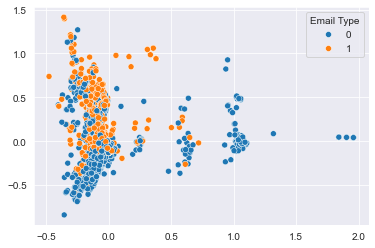

In [16]:
reduction = PCA(n_components=2).fit(X_train_split)
Z_train = reduction.transform(X_train_split)
Z_test = reduction.transform(X_test_split)
sns.scatterplot(x=Z_test[:,0],y=Z_test[:,1],hue=y_test_split)

The scams seem to have a higher PCA2 and a lower PCA1

### Q5.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

In [18]:
reduction = PCA(n_components=2610).fit(X_train_split)
Z_train = reduction.transform(X_train_split)
Z_test = reduction.transform(X_test_split)

lm_k = LinearRegression().fit(Z_train,y_train_split)
y_hat_test = lm_k.predict(Z_test)
y_hat_train = lm_k.predict(Z_train)

print('Train r2: ', r2_score(y_hat_train,y_train_split))
print('Test r2: ', r2_score(y_hat_test,y_test_split))

Train r2:  0.6928975360963756
Test r2:  0.587390597321719
Train r2:  0.6928975360963756
Test r2:  0.587390597321719


This performs a lot better than the original linear regression because the R^2 values of the test and train are closer together and the R^2 values from earlier did not tell us much or make much sense.

### Q6.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.

PCA is helpful because it reduces the dimensionality of the data so that we can retain more information while also stabalizing the model that we use. It also reduces overfitting since the data was very dimensional and has a lot of features.